# Analysis of Amazon Reviews
The aim of this task was to discover insights into consumer reviews and categorize the reviews into:
*positive, negative, and neutral sentiments.*

Sentiment analysis is a Natural Language Processing (NLP) technique that is used to analyze text data and determine the emotional tone, attitude, or sentiment expressed in text. It is done to assist organizations in tracking the sentiment of brands and products in consumer feedback and understanding customer demands.

This specific dataset was extracted from Amazon's website and is a list of 3150 Amazon customers reviews for Alexa Echo, Firestick, Echo Dot etc.

Source: [Kaggle](https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews)

### Import relevant libraries

In [1]:
import pandas as pd # Data manipulation and analysis
import nltk # NLP tasks

from textblob import TextBlob # Pre-trained sentiment analysis models for text

import sklearn # Building and evaluating the sentiment analysis models

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [2]:
data = pd.read_csv('amazon_alexa.tsv', sep='\t')

Lets analyze the dataset to understand what we are dealing with.

In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
data.shape

(3150, 5)

### Data Preprocessing

**Text preprocessing** is an essential step in natural language processing (NLP) tasks like sentiment analysis.
It involves cleaning and transforming the raw text data into a format that is more suitable for analysis by removing noise, irrelevant information, and inconsistencies

In [5]:
import re

# Preprocess the text by converting the review text to lowercase and
# removing any characters that are not English alphabet letters or whitespace.
data['cleaned_review'] = data['verified_reviews'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x.lower()))

# Display the preprocessed reviews
print(data[['verified_reviews', 'cleaned_review']].head())

                                    verified_reviews  \
0                                      Love my Echo!   
1                                          Loved it!   
2  Sometimes while playing a game, you can answer...   
3  I have had a lot of fun with this thing. My 4 ...   
4                                              Music   

                                      cleaned_review  
0                                       love my echo  
1                                           loved it  
2  sometimes while playing a game you can answer ...  
3  i have had a lot of fun with this thing my  yr...  
4                                              music  


### Performing the Sentiment Analysis
We need to define a function to analyze sentiment using TextBlob.

The *polarity* is a numerical value that indicates the emotional tone of the text, ranging from -1 (most negative) to 1 (most positive). The value 0 typically indicates neutral sentiment. 

In [6]:
def sentiment_analyze(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the cleaned reviews
data['sentiment'] = data['cleaned_review'].apply(sentiment_analyze)

# Display the sentiment analysis results
print(data[['cleaned_review', 'sentiment']].head())

                                      cleaned_review sentiment
0                                       love my echo  positive
1                                           loved it  positive
2  sometimes while playing a game you can answer ...  negative
3  i have had a lot of fun with this thing my  yr...  positive
4                                              music   neutral


### Visualization

#### Sentiments
A bar chart is a simple and effective way to visualize the distribution of sentiments in the reviews. It helps us  understand how many reviews are positive, negative, or neutral

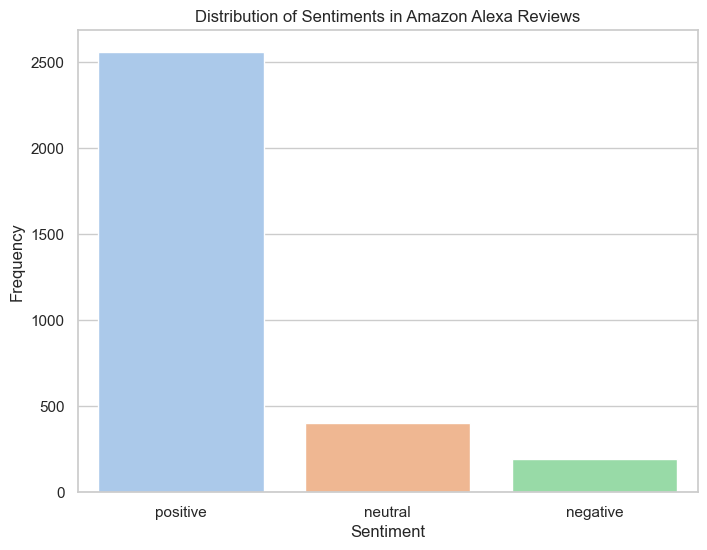

In [7]:
# Set the style for the plots
sns.set(style="whitegrid")

# Count the frequency of each sentiment
sentiment_counts = data['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")

# Add labels and title
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiments in Amazon Alexa Reviews")

# Show the plot
plt.show()

#### Product Ratings

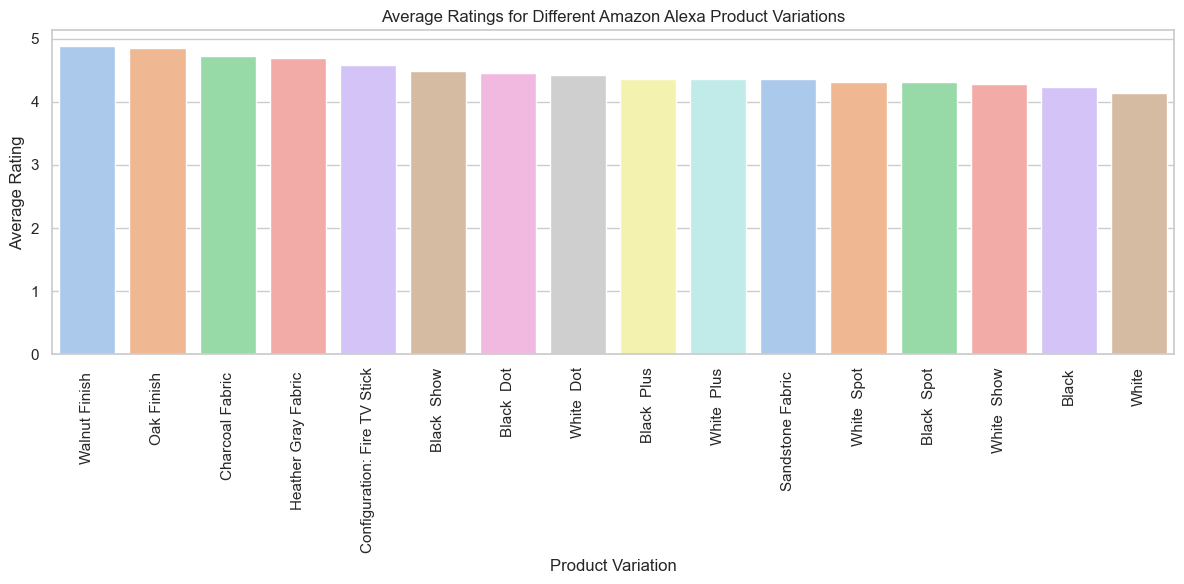

In [8]:
# Calculate the average rating for each product
average_ratings = data.groupby('variation')['rating'].mean()

# Sort products by average rating in descending order
sorted_products = average_ratings.sort_values(ascending=False)

# Create a bar plot for average ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_products.index, y=sorted_products.values, palette="pastel")

# Add labels and title
plt.xlabel("Product Variation")
plt.ylabel("Average Rating")
plt.title("Average Ratings for Different Amazon Alexa Product Variations")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

### Conclusion
We notice that the reviews are mostly positive indicating that this brand is an overall good purchase. It also has high ratings for the different product variations.